# Data Visualization

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys

sys.path.append("../../")

In [3]:
# path to the data
data_path = os.path.join(os.getcwd(), "../data_storage")
# Import the dataset water, electricity and gas
water = pd.read_csv(os.path.join(data_path, "water.csv"))
power = pd.read_csv(os.path.join(data_path, "power.csv"))
gas = pd.read_csv(os.path.join(data_path, "gas.csv"))
gas_color = sns.color_palette("husl", 8)[0]
power_color = sns.color_palette("husl", 8)[1]
water_color = sns.color_palette("husl", 8)[2]

In [4]:
water

,date_eom,date,days,water_m3,cons,av_day,days_month,days_cons,missing_days,calc_cons,diff_cons
0,2011-06-30,2011-06-01,0.0,1.0,0.0,0.219512,30,30,0,6.585366,-6.585366
1,2011-07-31,2011-07-12,41.0,10.0,9.0,0.219512,31,12,19,7.721578,1.278422
2,2011-08-31,2011-08-01,NaN,NaN,NaN,0.267760,31,31,0,8.300546,NaN
3,2011-09-30,2011-09-01,NaN,NaN,NaN,0.267760,30,30,0,8.032787,NaN
4,2011-10-31,2011-10-01,NaN,NaN,NaN,0.267760,31,31,0,8.300546,NaN
...,...,...,...,...,...,...,...,...,...,...,...
185,2024-08-31,2024-08-01,NaN,NaN,NaN,NaN,31,31,0,NaN,NaN
186,2024-09-30,2024-09-01,NaN,NaN,NaN,NaN,30,30,0,NaN,NaN
187,2024-10-31,2024-10-01,NaN,NaN,NaN,NaN,31,31,0,NaN,NaN
188,2024-11-30,2024-11-01,NaN,NaN,NaN,NaN,30,30,0,NaN,NaN


## Process the data to prepare for visualization

In [5]:
# Function to process the data
def process_data(data):
    # copy the dataset
    data_proc = data.copy()
    # Convert the date column to a datetime object
    data_proc["date"] = pd.to_datetime(data_proc["date"])
    # Sort the data by date
    data_proc = data_proc.sort_values("date")
    # Drop the columns that are not needed
    data_proc = data_proc.drop(columns=["days", "diff_cons", "days_month", "days_cons"])
    # # Convert the data to a numpy array
    # data = data.to_numpy()
    # Return the data
    return data_proc


# Process the data
water = process_data(water)
power = process_data(power)
gas = process_data(gas)

## General functions

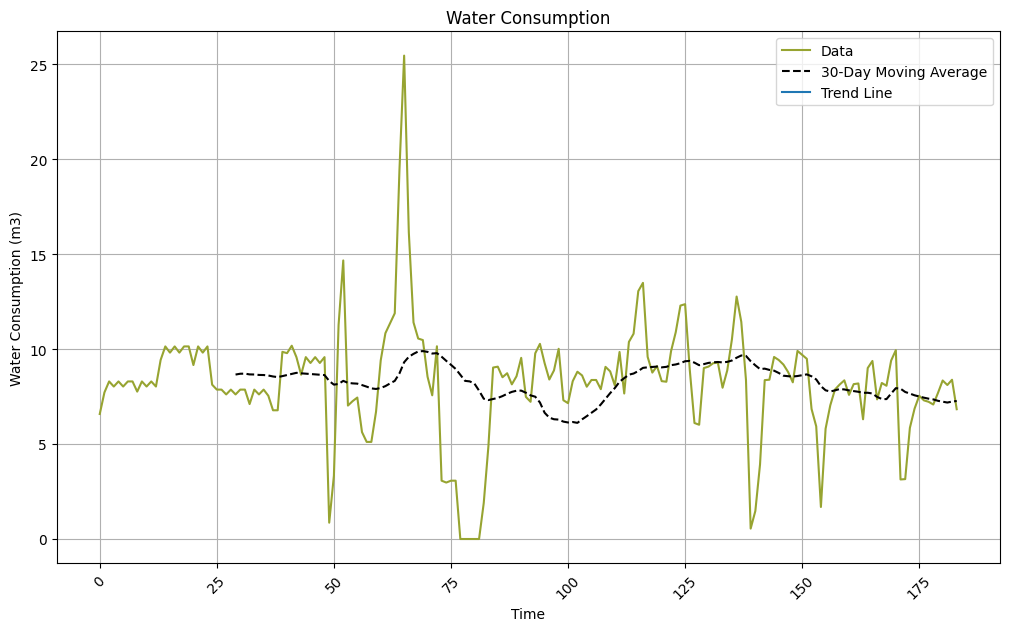

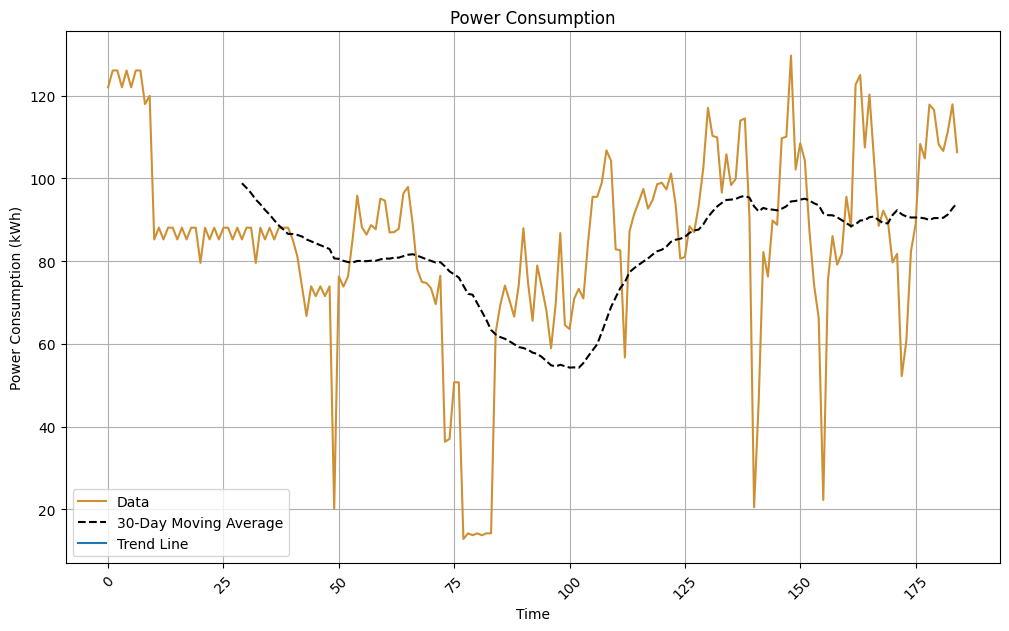

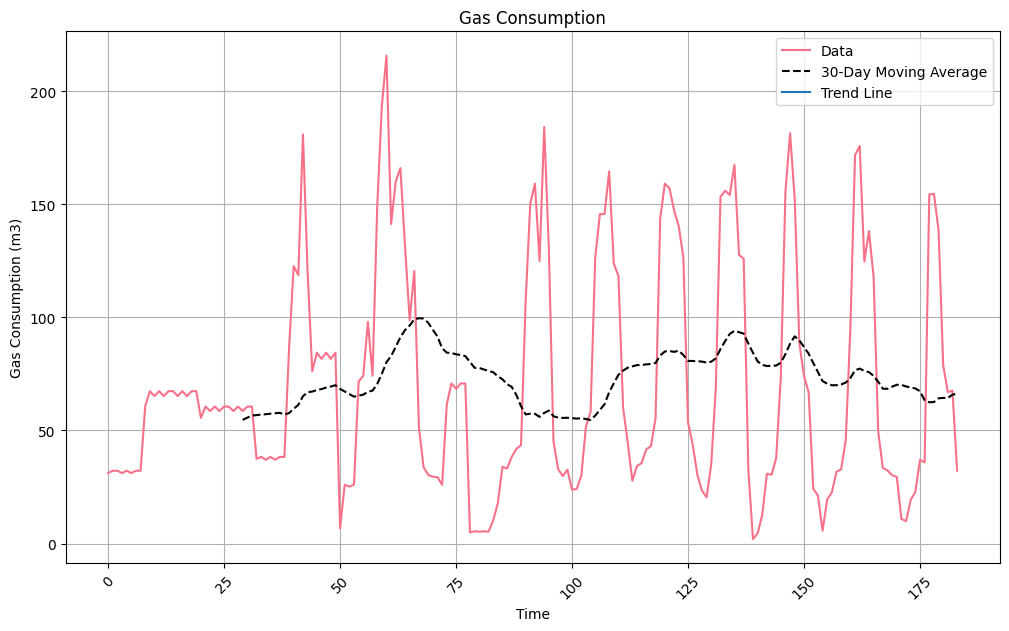

In [6]:
# Function to plot the data
def plot_data(data, title, ylabel, xlabel, color):
    plt.figure(figsize=(10, 6))
    plt.plot(data, color=color)
    plt.grid()
    # moving average
    plt.plot(data.rolling(window=30).mean(), color="black", linestyle="--")
    # trend line
    plt.plot(data.index, np.poly1d(np.polyfit(data.index, data, 1))(data.index))
    plt.legend(["Data", "30-Day Moving Average", "Trend Line"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()



# Plot the data
plot_data(
    water["calc_cons"], "Water Consumption", "Water Consumption (m3)", "Time", water_color
)
plot_data(
    power["calc_cons"], "Power Consumption", "Power Consumption (kWh)", "Time", power_color
)
plot_data(gas["calc_cons"], "Gas Consumption", "Gas Consumption (m3)", "Time", gas_color)

In [50]:
# function to group by day, week, month, quarter, season and year the data
def group_data(data):
    # Convert the date column to a datetime object
    data["date"] = pd.to_datetime(data["date"])
    # Group the data by day
    data_day = data.resample("D", on="date").sum()
    # Group the data by week
    data_week = data.resample("W", on="date").sum()
    # Group the data by month
    data_month = data.resample("ME", on="date").sum()
    # Group the data by quarter
    data_quarter = data.resample("QE", on="date").sum()
    # Group the data by season
    data_season = data.resample("QE-FEB", on="date").sum()
    # Group the data by year
    data_year = data.resample("YE", on="date").sum()
    # Convert the date column to a datetime object
    data_day["date"] = data_day.index
    data_week["date"] = data_week.index
    data_month["date"] = data_month.index
    data_quarter["date"] = data_quarter.index
    data_season["date"] = data_season.index
    data_year["date"] = data_year.index
    # Return the data
    return data_day, data_week, data_month, data_quarter, data_season, data_year


# Group the data
water_day, water_week, water_month, water_quarter, water_season, water_year = (
    group_data(water)
)
power_day, power_week, power_month, power_quarter, power_season, power_year = (
    group_data(power)
)
gas_day, gas_week, gas_month, gas_quarter, gas_season, gas_year = group_data(gas)

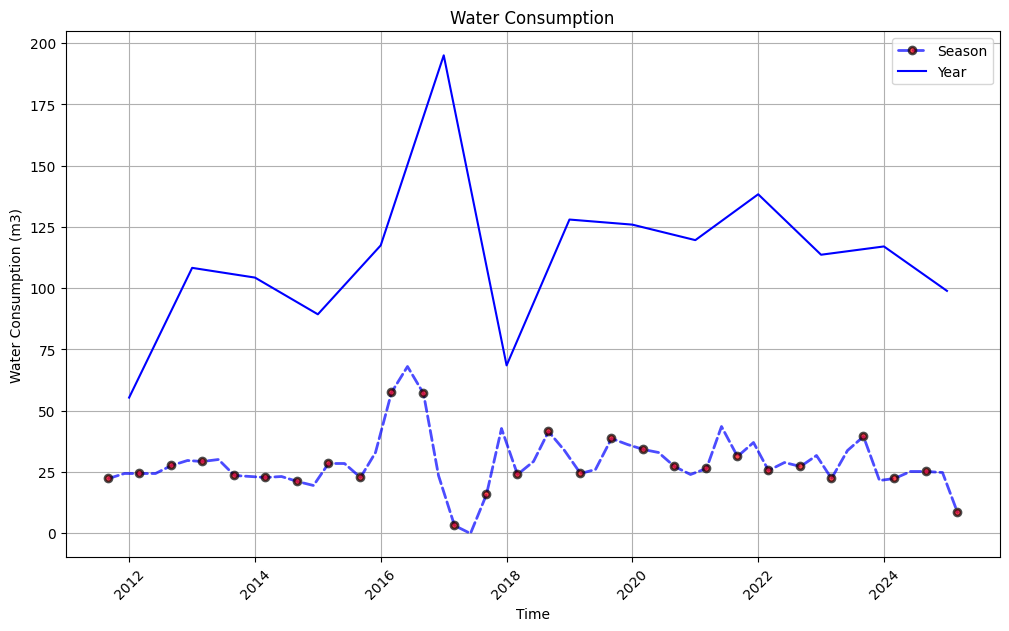

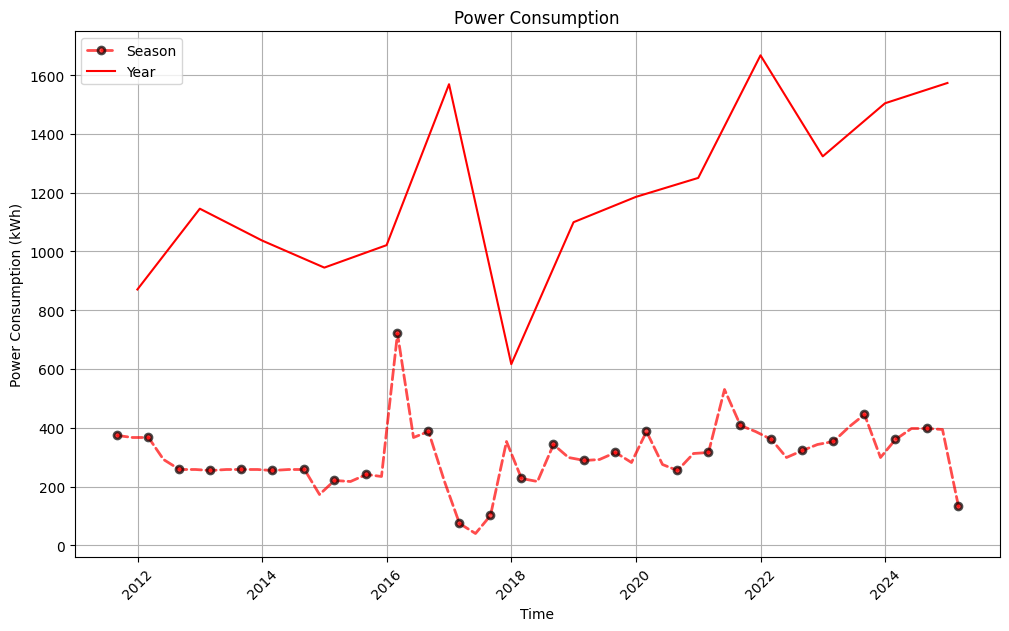

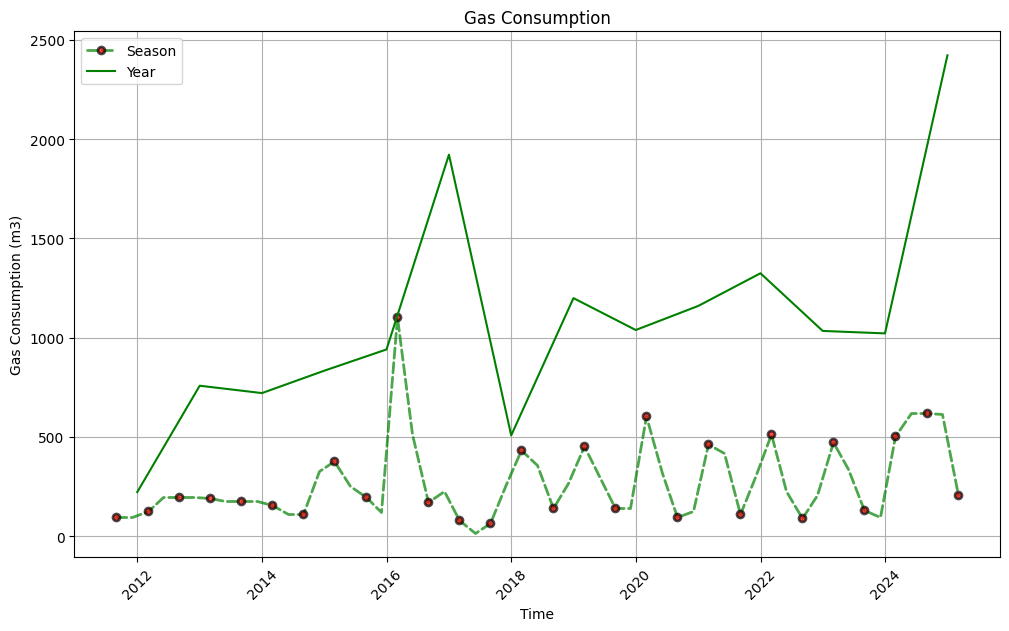

In [48]:
# Function to plot the data grouped by day, week, month, quarter, season and year
def plot_grouped_data(
    data_day,
    data_week,
    data_month,
    data_quarter,
    data_season,
    data_year,
    title,
    ylabel,
    xlabel,
    color,
):
    plt.figure(figsize=(10, 6))
    # plt.plot(data_day, color=color, label="Day")
    # plt.plot(data_week, color=color, label="Week")
    # plt.plot(data_month, color=color, label="Month")
    # plt.plot(data_quarter, color=color, label="Quarter")
    # plot data by season showing winter, spring, summer and autumn with different colors
    plt.plot(
        data_season,
        color=color,
        label="Season",
        marker="o",
        markersize=5,
        linestyle="--",
        linewidth=2,
        alpha=0.7,
        markerfacecolor="red",
        markeredgewidth=2,
        markeredgecolor="black",
        markevery=2,
        zorder=2,
        clip_on=True,
        solid_capstyle="round",
        dash_capstyle="round",
        dash_joinstyle="round",
        solid_joinstyle="round",
        antialiased=True,
        pickradius=5,
        snap=True,
        rasterized=True,
        path_effects=None,
        sketch_params=None,
    )
    plt.plot(data_year, color=color, label="Year")
#    # moving average
#     plt.plot(data_year.rolling(window=30).mean(), color="black", linestyle="--")
#     # trend line
#     plt.plot(data_year.index, np.poly1d(np.polyfit(data_year.index, data_year, 1))(data_year.index))
    # color each season
    # plt.fill_between(
    #     data_season.index,
    #     data_season["calc_cons"],
    #     color="blue",
    #     alpha=0.1,
    #     label="Winter",
    # )
    # plt.fill_between(
    #     data_season.index,
    #     data_season["calc_cons"],
    #     color="green",
    #     alpha=0.1,
    #     label="Spring",
    # )
    # plt.fill_between(
    #     data_season.index,
    #     data_season["calc_cons"],
    #     color="red",
    #     alpha=0.1,
    #     label="Summer",
    # )
    # plt.fill_between(
    #     data_season.index,
    #     data_season["calc_cons"],
    #     color="orange",
    #     alpha=0.1,
    #     label="Autumn",
    # )
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()


# Plot the data
plot_grouped_data(
    water_day["calc_cons"],
    water_week["calc_cons"],
    water_month["calc_cons"],
    water_quarter["calc_cons"],
    water_season["calc_cons"],
    water_year["calc_cons"],
    "Water Consumption",
    "Water Consumption (m3)",
    "Time",
    "blue",
)
plot_grouped_data(power_day["calc_cons"], power_week["calc_cons"], power_month["calc_cons"], power_quarter["calc_cons"], power_season["calc_cons"], power_year["calc_cons"], "Power Consumption", "Power Consumption (kWh)", "Time", "red")
plot_grouped_data(gas_day["calc_cons"], gas_week["calc_cons"], gas_month["calc_cons"], gas_quarter["calc_cons"], gas_season["calc_cons"], gas_year["calc_cons"], "Gas Consumption", "Gas Consumption (m3)", "Time", "green")

In [ ]:
# Function to plot min, max and average consumption
def plot_min_max_avg(data, title, ylabel, xlabel, color):
    plt.figure(figsize=(10, 6))
    plt.plot(data["calc_cons"].resample("D", on="date").min(), color=color, label="Min")
    plt.plot(data["calc_cons"].resample("D", on="date").max(), color=color, label="Max")
    plt.plot(
        data["calc_cons"].resample("D", on="date").mean(), color=color, label="Average"
    )
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()


# Plot the data
plot_min_max_avg(water, "Water Consumption", "Water Consumption (m3)", "Time", "blue")